In [1]:
import os
import glob
import wave
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase

import plotly.express as px
import plotly.graph_objects as go

from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft

import torch
import torch.onnx
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [2]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))

    freqs, _, spec = signal.spectrogram(
        audio,
        fs=sample_rate,
        window='hann',
        nperseg=nperseg,
        noverlap=noverlap,
        detrend=False
    )

    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [3]:
def audio2spectrogram(filepath):
    samplerate, test_sound  = wavfile.read(filepath, mmap=True)

    _, spectrogram = log_specgram(test_sound, samplerate)
    print(spectrogram.shape)
    print(type(spectrogram))

    fig = plt.figure(figsize=(5,5))
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.show()

def audio2wave(filepath):
    samplerate, test_sound = wavfile.read(filepath, mmap=True)

    fig = plt.figure(figsize=(5,5))
    plt.plot(test_sound)
    plt.show()

(455, 161)
<class 'numpy.ndarray'>


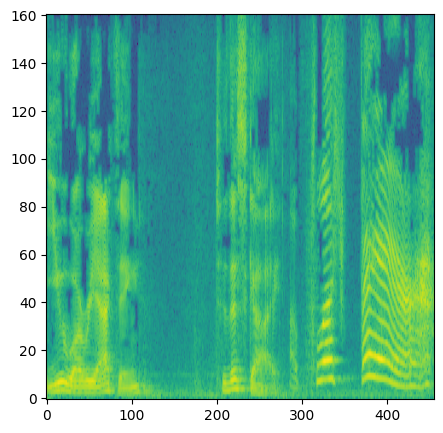

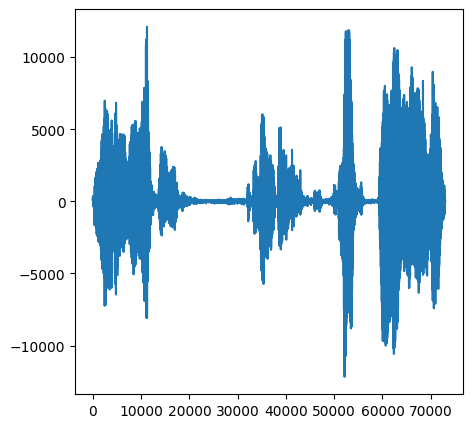

In [4]:
filepath="D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k/test/80'sTOYS4_2.wav"

audio2spectrogram(filepath)
audio2wave(filepath)

In [5]:
np.ceil(7/2)

4.0

## Audio length analysis

In [6]:
audio_path = "D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k"

divisions_stats = {}

divisions_path = glob.glob(os.path.join(audio_path, "*"))
for div_path in divisions_path:
    div_name = os.path.basename(div_path)
    divisions_stats.update({
        div_name: {
            "length": [],
            "height": []
        }
    })
    for audio_path in tqdm(glob.glob(os.path.join(div_path, "*"))):
        samplerate, test_sound  = wavfile.read(audio_path, mmap=True)
        _, spectrogram = log_specgram(test_sound, samplerate)
        spect_shape = spectrogram.shape
        divisions_stats[div_name]["length"].append(spect_shape[0])
        divisions_stats[div_name]["height"].append(spect_shape[1])

len(divisions_stats.keys())
divisions_stats.keys()

100%|██████████| 303/303 [00:02<00:00, 112.95it/s]


dict_keys(['test', 'train', 'val'])

In [10]:
# Create a box plot for each list
div_name = "train"
trace1 = go.Violin(y=divisions_stats[div_name]["length"],
                   name=f'TRAIN length',
                   box_visible=True,
                   meanline_visible=True,
                   points="all")

div_name = "val"
trace2 = go.Violin(y=divisions_stats[div_name]["length"],
                   name=f'VAL length',
                   box_visible=True,
                   meanline_visible=True,
                   points="all")

div_name = "test"
trace3 = go.Violin(y=divisions_stats[div_name]["length"],
                   name=f'TEST length',
                   box_visible=True,
                   meanline_visible=True,
                   points="all")

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3])

# Show figure
fig.show()


# Create a box plot for each list
div_name = "train"
trace1 = go.Violin(y=divisions_stats[div_name]["height"],
                   name=f'TRAIN height',
                   box_visible=True,
                   meanline_visible=True,
                   points="all")

div_name = "val"
trace2 = go.Violin(y=divisions_stats[div_name]["height"],
                   name=f'VAL height',
                   box_visible=True,
                   meanline_visible=True,
                   points="all")

div_name = "test"
trace3 = go.Violin(y=divisions_stats[div_name]["height"],
                   name=f'TEST height',
                   box_visible=True,
                   meanline_visible=True,
                   points="all")

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3])

# Show figure
fig.show()

In [30]:
for key in divisions_stats.keys():
    print(key)
    print(f"     length: {np.unique(divisions_stats[key]['length'], return_counts=True)}")
    print(f"     height: {np.unique(divisions_stats[key]['height'], return_counts=True)}")
    print()

test
     length: (array([ 283,  285,  287,  290,  292,  294,  297,  299,  304,  306,  308,
        311,  313,  315,  318,  320,  322,  325,  327,  329,  332,  334,
        336,  339,  341,  343,  345,  348,  350,  352,  355,  357,  359,
        362,  366,  369,  371,  373,  376,  378,  387,  390,  392,  394,
        397,  399,  401,  404,  408,  411,  413,  415,  417,  422,  424,
        427,  429,  431,  434,  438,  441,  443,  445,  448,  450,  452,
        455,  459,  462,  464,  466,  469,  473,  478,  480,  482,  489,
        492,  494,  496,  499,  501,  503,  506,  508,  510,  513,  517,
        524,  531,  536,  538,  541,  543,  545,  548,  550,  552,  554,
        561,  566,  568,  571,  573,  578,  582,  585,  592,  596,  601,
        603,  608,  610,  613,  615,  617,  622,  624,  629,  631,  633,
        640,  645,  647,  650,  652,  654,  661,  664,  668,  673,  680,
        689,  696,  698,  705,  708,  710,  724,  729,  733,  745,  747,
        752,  754,  756,  759,  

In [ ]:
def get_wav_duration(filename):
    with wave.open(filename, 'r') as f:
        frames = f.getnframes()
        rate = f.getframerate()
        # print(frames, rate)
        duration = frames / float(rate)

        return duration

In [ ]:
audio_path = "D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k"

divisions_stats = {}

divisions_path = glob.glob(os.path.join(audio_path, "*"))
for div_path in divisions_path:
    div_name = os.path.basename(div_path)
    divisions_stats.update({
        div_name: {
            "length": []
        }
    })
    for audio_path in tqdm(glob.glob(os.path.join(div_path, "*"))):
        duration = get_wav_duration(filepath)
        divisions_stats[div_name]["length"].append(duration)

for key in divisions_stats.keys():
    print(key)
    print(f"     length: {np.unique(divisions_stats[key]['length'], return_counts=True)}")
    print()

In [ ]:
N_CHANNELS = 3
def get_3d_spec(Sxx_in, moments=None):
    if moments is not None:
        (base_mean, base_std, delta_mean, delta_std,
             delta2_mean, delta2_std) = moments
    else:
        base_mean, delta_mean, delta2_mean = (0, 0, 0)
        base_std, delta_std, delta2_std = (1, 1, 1)
    h, w = Sxx_in.shape
    right1 = np.concatenate([Sxx_in[:, 0].reshape((h, -1)), Sxx_in], axis=1)[:, :-1]
    delta = (Sxx_in - right1)[:, 1:]
    delta_pad = delta[:, 0].reshape((h, -1))
    delta = np.concatenate([delta_pad, delta], axis=1)
    right2 = np.concatenate([delta[:, 0].reshape((h, -1)), delta], axis=1)[:, :-1]
    delta2 = (delta - right2)[:, 1:]
    delta2_pad = delta2[:, 0].reshape((h, -1))
    delta2 = np.concatenate([delta2_pad, delta2], axis=1)
    base = (Sxx_in - base_mean) / base_std
    delta = (delta - delta_mean) / delta_std
    delta2 = (delta2 - delta2_mean) / delta2_std
    stacked = [arr.reshape((h, w, 1)) for arr in (base, delta, delta2)]
    return np.concatenate(stacked, axis=2)

In [ ]:
filepath="D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k/test/80'sTOYS4_2.wav"

samplerate, test_sound  = wavfile.read(filepath, mmap=True)
_, spectrogram = log_specgram(test_sound, samplerate)
print(spectrogram.shape)
plt.imshow(spectrogram.T, aspect='auto', origin='lower')

In [ ]:
from scipy.ndimage import sobel


def gradients_channels(grayscale_array):
    gradient_x = sobel(grayscale_array, axis=0)
    gradient_y = sobel(grayscale_array, axis=1)

    return np.stack([grayscale_array, gradient_x, gradient_y], axis=-1)


filepath="D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k/test/80'sTOYS4_2.wav"

samplerate, test_sound  = wavfile.read(filepath, mmap=True)
_, spectrogram = log_specgram(test_sound, samplerate)
spectrogram = gradients_channels(spectrogram)
spectrogram.shape

# plt.imshow(np.transpose(spectrogram, (1,0,2)), origin='lower')

In [ ]:
filepath="D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k/test/80'sTOYS4_2.wav"

samplerate, test_sound  = wavfile.read(filepath, mmap=True)
_, spectrogram = log_specgram(test_sound, samplerate)
spectrogram = get_3d_spec(spectrogram)
spectrogram.shape

# plt.imshow(np.transpose(spectrogram, (1,0,2)), origin='lower')

In [ ]:
# filepath="D:/Projects/masters_diploma/data/processed/EmoReact/audio_216k/test/80'sTOYS4_2.wav"
#
# duration = get_wav_duration(filepath)
# print(f"The duration of the audio file is {duration} seconds.")

In [ ]:
# # Create a box plot for each list
# trace1 = go.Violin(y=divisions_stats[div_name]["length"],
#                    name=f'TRAIN length',
#                    box_visible=True,
#                    meanline_visible=True,
#                    points="all")
#
# trace2 = go.Violin(y=divisions_stats[div_name]["length"],
#                    name=f'VAL length',
#                    box_visible=True,
#                    meanline_visible=True,
#                    points="all")
#
# trace3 = go.Violin(y=divisions_stats[div_name]["length"],
#                    name=f'TEST length',
#                    box_visible=True,
#                    meanline_visible=True,
#                    points="all")
#
# # Create figure
# fig = go.Figure(data=[trace1, trace2, trace3])
#
# # Show figure
# fig.show()


div_name = "train"

# # Create a box plot for each list
# trace1 = go.Violin(y=divisions_stats[div_name]["height"],
#                    name=f'TRAIN height',
#                    box_visible=True,
#                    meanline_visible=True,
#                    points="all")
#
# trace2 = go.Violin(y=divisions_stats[div_name]["height"],
#                    name=f'VAL height',
#                    box_visible=True,
#                    meanline_visible=True,
#                    points="all")
#
# trace3 = go.Violin(y=divisions_stats[div_name]["height"],
#                    name=f'TEST height',
#                    box_visible=True,
#                    meanline_visible=True,
#                    points="all")
#
# # Create figure
# fig = go.Figure(data=[trace1, trace2, trace3])
#
# # Show figure
# fig.show()